In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [24]:
data = load_breast_cancer()

X = data.data
y = data.target


In [25]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [26]:
X = pd.DataFrame(X, columns=data.feature_names)

In [27]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [29]:
X_train.shape

(455, 30)

In [30]:
X.shape

(569, 30)

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000)


In [39]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [40]:
clf.score(X_test, y_test)

0.9824561403508771

In [41]:
C_range_exp = np.arange(-15.0, 21.0)
C_range = 10 ** C_range_exp


In [42]:
C_range

array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])

In [43]:
from sklearn.model_selection import GridSearchCV
param = {'C' : C_range}
gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)


GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])})

In [46]:
gs.best_estimator_

LogisticRegression(C=10.0, max_iter=10000)

In [48]:
C_range_exp

array([-15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,
        -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,
         7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
        18.,  19.,  20.])

In [49]:
gs.cv_results_

{'mean_fit_time': array([0.00199432, 0.00190101, 0.00150557, 0.00149803, 0.00162902,
        0.00147185, 0.00527043, 0.00517159, 0.00452318, 0.00426102,
        0.00354276, 0.00321579, 0.00283813, 0.00277014, 0.00334926,
        0.00580626, 0.00984039, 0.02029414, 0.04329362, 0.0812254 ,
        0.11926284, 0.12854905, 0.08469038, 0.04505644, 0.02508941,
        0.01928477, 0.01896915, 0.01940403, 0.0193265 , 0.01825638,
        0.01627889, 0.01651731, 0.01618714, 0.01622086, 0.01663871,
        0.01633167]),
 'std_fit_time': array([2.20377111e-04, 1.90611060e-04, 6.49719981e-05, 6.64010767e-05,
        1.29957294e-04, 8.16605874e-05, 7.76362650e-05, 3.90654976e-04,
        1.27896455e-04, 2.06800818e-04, 1.34818706e-04, 6.27206737e-05,
        1.55482625e-04, 9.62308187e-05, 8.19895668e-05, 5.32048640e-04,
        1.46595681e-03, 2.67235570e-03, 3.23570362e-03, 2.33914111e-02,
        5.05109578e-02, 6.21806621e-02, 4.48607296e-02, 2.40897785e-02,
        9.93859725e-03, 6.62442117e-0

In [51]:
gs.best_params_,gs.best_score_,gs.best_estimator_


({'C': 10.0}, 0.9736263736263737, LogisticRegression(C=10.0, max_iter=10000))

In [52]:
gs.best_estimator_

LogisticRegression(C=10.0, max_iter=10000)

In [53]:
gs.score(X_test, y_test)

0.9736842105263158

In [55]:
clf_best = gs.best_estimator_
#clf_best.fit(X_train, y_train)
clf_best.score(X_test, y_test)


0.9736842105263158

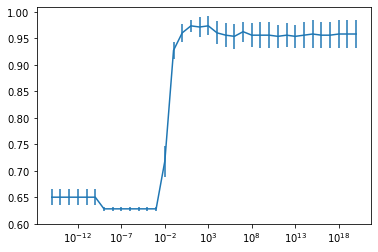

In [58]:
plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_test_score'],
             yerr=gs.cv_results_['std_test_score'],
             label='test(val)')
plt.ylim(0.6, 1.01)
plt.xscale('log')

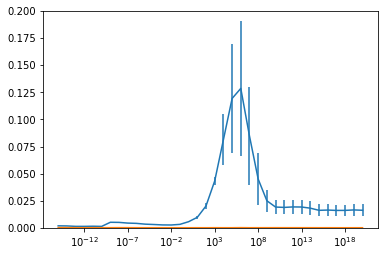

In [59]:
plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_fit_time'],
             yerr=gs.cv_results_['std_fit_time'],label='train')

plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_score_time'],
             yerr=gs.cv_results_['std_score_time'],
             label='test')

plt.ylim(0,)
plt.xscale('log')



In [64]:
from sklearn.svm import SVC

clf = SVC()

C_range_exp = np.arange(-2.0, 5.0)
C_range = 10 ** C_range_exp

params = {'C': C_range, 'kernel': ['linear','rbf']},


gs = GridSearchCV(clf, params, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.9s finished


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=({'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                          'kernel': ['linear', 'rbf']},),
             verbose=2)

In [66]:
gs.best_params_

{'C': 1.0, 'kernel': 'rbf'}

In [67]:
gs.best_score_

0.9802197802197803

In [68]:
gs.best_estimator_

SVC()

In [69]:
gs.cv_results_

{'mean_fit_time': array([0.00828171, 0.00927558, 0.00459313, 0.00727558, 0.00339103,
        0.00529089, 0.00362258, 0.00577869, 0.00560241, 0.00445623,
        0.00938816, 0.00432391, 0.01501102, 0.00441217]),
 'std_fit_time': array([0.00045876, 0.00211893, 0.0001477 , 0.00098997, 0.00027544,
        0.00190485, 0.00027702, 0.00260076, 0.00122272, 0.00026357,
        0.00281177, 0.00026472, 0.00680378, 0.00025833]),
 'mean_score_time': array([0.00224409, 0.00258737, 0.00141997, 0.00187631, 0.00114908,
        0.00123353, 0.00114493, 0.00114622, 0.00094004, 0.00102201,
        0.00080805, 0.0009716 , 0.00079675, 0.00082164]),
 'std_score_time': array([9.34651432e-05, 5.47371163e-04, 1.35906119e-05, 5.76388244e-05,
        1.07037633e-04, 5.34241508e-05, 3.35220029e-04, 9.80232234e-05,
        1.75065319e-04, 5.24196958e-05, 5.82146503e-05, 9.42295136e-05,
        6.67378534e-05, 1.01264249e-04]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1.0, 1.0, 10.0, 10.0, 100.0,
        

/home/ma/.bin/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:3225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/ma/.bin/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:3257: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


ValueError: x and y must have same first dimension, but have shapes (7,) and (14,)

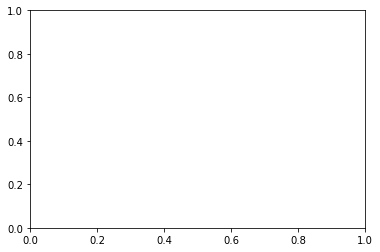

In [70]:
s_linear = [gs.cv_results_['param_kernel']=='linear']

plt.plot(gs.cv_results_['param_C'][s_linear].data,
         gs.cv_results_['mean_test_score'])
